<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>

<h1> Hackwagon Academy DS101 Lesson 6 </h1>
<h2> Exploratory Data Analysis (EDA) </h2> 
<h3> Lesson Outline </h3>

1. Data Science Project Stages
2. Case Study - Resale Flat Prices
    1. Understanding the data
    2. Initial Exploration
       + Preliminary Findings
    3. Descriptive Analysis 
3. In-Class Practice

<h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=25 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Data Science Project Stages </font> </h2></a>

<img src="https://i.imgur.com/pIc9rZc.png">

<hr>

# <font color="salmon">Resale Flat Prices</font>
by [Housing and Development Board (HDB)](https://data.gov.sg/dataset/resale-flat-prices?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee)

<img src="https://stackedhomes.com/blog/wp-content/uploads/2017/05/Housing_and_Development_Board_flats_in_Bukit_Panjang_Singapore_-_20130131_single-row_panorama.jpg">

<font style="float: right" size=1>Photo by: <a href="https://stackedhomes.com/blog/wp-content/uploads/2017/05/Housing_and_Development_Board_flats_in_Bukit_Panjang_Singapore_-_20130131_single-row_panorama-1360x460.jpg">stackedhomes</a></font>

<hr>
<center>
    <img src="https://static.bocoup.com/blog/showing-missing-data-in-line-charts/feature_image.gif" width=700>
    <h1>I. Understanding The Data</h1>
</center>
<hr>

# Read & view dataset
1. _Read the dataset `flats.csv` into Python and store it into a variable named `data`_.
2. Display the first row.

In [6]:
import csv

with open('hdb_resale_flats.csv') as file:
    data = []
    
    for row in csv.DictReader(file):
       data.append(dict(row))

data[:3]


[{'block': '172',
  'flat_model': 'Improved',
  'flat_type': '2 ROOM',
  'floor_area_sqm': '45.0',
  'lease_commence_date': '1986',
  'month': '2012-03',
  'remaining_lease': '',
  'resale_price': '250000.0',
  'storey_range': '06 TO 10',
  'street_name': 'ANG MO KIO AVE 4',
  'town': 'ANG MO KIO',
  'street_lat': '1.3764936',
  'street_lon': '103.8394801',
  'town_lat': '1.3691149',
  'town_lon': '103.8454342'},
 {'block': '510',
  'flat_model': 'Improved',
  'flat_type': '2 ROOM',
  'floor_area_sqm': '44.0',
  'lease_commence_date': '1980',
  'month': '2012-03',
  'remaining_lease': '',
  'resale_price': '265000.0',
  'storey_range': '01 TO 05',
  'street_name': 'ANG MO KIO AVE 8',
  'town': 'ANG MO KIO',
  'street_lat': '1.3705114999999999',
  'street_lon': '103.8488158',
  'town_lat': '1.3691149',
  'town_lon': '103.8454342'},
 {'block': '610',
  'flat_model': 'New Generation',
  'flat_type': '3 ROOM',
  'floor_area_sqm': '68.0',
  'lease_commence_date': '1980',
  'month': '2012-03

## Dataset Characteristics

+ `Columns`
> **Richness / dimensionality**
    - Data types
        - Categorical, Numeric, Datetime
        - Nominal, ordinal, interval, ratio

+ `Rows`
> **Normalisation**: what 1 row represents

+ `Misc.`
>  **Cleanliness**
    - Dirty data & missing values

<img src="https://image.flaticon.com/icons/svg/1491/1491416.svg" width=50 align="left"> 

### &nbsp; _With the dataset's characteristics, what **can** I analyse?_

In [3]:
from IPython.display import IFrame; IFrame("https://data.gov.sg/dataset/resale-flat-prices/resource/42ff9cfe-abe5-4b54-beda-c88f9bb438ee/view/8481923a-3673-4b4c-b443-5a5bf5127215", width="100%", height="600")

<hr>
<center>
    <h1> II. Initial Exploration </h1> 
    <br>
    <i>Based on the columns available and their data types, ask simple questions that help you understand the data better and possible avenues to explore</i>
</center>
<hr>

# Format the Data

Convert the following datapoints to appropriate data types:
1. `resale_price` : `float`
2. `floor_area_sqm` : `float`
3. `town_lon` : `float`
4. `town_lat` : `float`

In [7]:
for row in data:
    row['resale_price'] = float(row['resale_price'])
    row['floor_area_sqm'] = float(row['floor_area_sqm'])
    row['town_lon'] = float(row['town_lon'])
    row['town_lat'] = float(row['town_lat'])

data[0]

{'block': '172',
 'flat_model': 'Improved',
 'flat_type': '2 ROOM',
 'floor_area_sqm': 45.0,
 'lease_commence_date': '1986',
 'month': '2012-03',
 'remaining_lease': '',
 'resale_price': 250000.0,
 'storey_range': '06 TO 10',
 'street_name': 'ANG MO KIO AVE 4',
 'town': 'ANG MO KIO',
 'street_lat': '1.3764936',
 'street_lon': '103.8394801',
 'town_lat': 1.3691149,
 'town_lon': 103.8454342}

## _Preliminary_ Findings

To understand the dataset at hand, we can first start off with asking simple questions to identify some of its key characteristics (statistical or otherwise).

### Analysing categorical Data
_Reducing data into groups, aggregating columns_

<h2><img src="https://image.flaticon.com/icons/svg/1628/1628194.svg" width=25 align="left"> <font color="salmon"> &nbsp; Example </font></h2>

#### `Aggregation (grouping)`
> - How many flats were sold in each town?

<div class="alert alert-info"><b>Hint</b>: Aggregation with dictionaries</div>

Expected output (order doesn't matter):
```python
{'ANG MO KIO': 6814,
 'BEDOK': 8706,
 'BISHAN': 2666,
 ...}
```

In [16]:
sales_by_town = {}

for row in data:
    town = row['town']
    if town not in sales_by_town:
        sales_by_town[town] = 1
    else:
        sales_by_town[town] += 1

sales_by_town

{'ANG MO KIO': 6814,
 'BEDOK': 8706,
 'BISHAN': 2666,
 'BUKIT BATOK': 5691,
 'BUKIT MERAH': 5617,
 'BUKIT PANJANG': 4988,
 'BUKIT TIMAH': 345,
 'CENTRAL AREA': 1176,
 'CHOA CHU KANG': 5986,
 'CLEMENTI': 3407,
 'GEYLANG': 3815,
 'HOUGANG': 7030,
 'JURONG EAST': 3257,
 'JURONG WEST': 11309,
 'KALLANG/WHAMPOA': 4274,
 'MARINE PARADE': 944,
 'PASIR RIS': 4476,
 'PUNGGOL': 6402,
 'QUEENSTOWN': 3860,
 'SEMBAWANG': 3646,
 'SENGKANG': 9657,
 'SERANGOON': 3049,
 'TAMPINES': 9757,
 'TOA PAYOH': 4615,
 'WOODLANDS': 11164,
 'YISHUN': 9017}

<h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Try It Out I </font></h2>

> - How many different types of flats are there, and how many each?

Expected output (order doesn't matter):
```python
{'2 ROOM': 1597,
 '3 ROOM': 38082,
 '4 ROOM': 57002,
 '5 ROOM': 33553,
 'EXECUTIVE': 11300,
 'MULTI-GENERATION': 52,
 '1 ROOM': 82}
```

In [10]:
sales_by_type = {}

for row in data:
    flat_type = row['flat_type']
    if flat_type not in sales_by_type:
        sales_by_type[flat_type] = 1
    else:
        sales_by_type[flat_type] += 1

sales_by_type

{'2 ROOM': 1597,
 '3 ROOM': 38082,
 '4 ROOM': 57002,
 '5 ROOM': 33553,
 'EXECUTIVE': 11300,
 'MULTI-GENERATION': 52,
 '1 ROOM': 82}

<hr>

### Analysing numeric data

#### Statistical analysis
_Measures to gauge how the data is distributed_

<h2><img src="https://image.flaticon.com/icons/svg/1628/1628194.svg" width=25 align="left"> <font color="salmon"> &nbsp; Example</font></h2>

`Central Tendency`
>  - What is the mean, median resale price of a given (or each) town?

### Hint:
Use a dictionary to aggregate the data into the following format:
```python
{
    # town:       prices
    'ANG MO KIO': [100000, 200000, ...],
    'BUKIT BATOK': [200000, 70000, ...],
    ...
}

```
Then, loop over the dictionary and call the appropriate statistics function on the prices

Expected output:
```
ANG MO KIO
  mean: $416695.36
  median: $368000.00

BEDOK
  mean: $419418.30
  median: $385000.00

BISHAN
  mean: $613295.52
  median: $590000.00
  
...
```

In [25]:
import statistics

town_prices = {}

# Step 1: Accumulate towns and their prices into town_prices
for row in data:
    town = row['town']
    price = row['resale_price']
    if town not in town_prices:
        town_prices[town] = []
    town_prices[town].append(price)

town_prices

# Step 2: Loop over town_prices and call statistics functions
for town, price_list in town_prices.items():
    print(town)
    print(f'  mean: ${round(statistics.mean(price_list),2)},')
    print(f'  median: ${round(statistics.median(price_list),2)}')


ANG MO KIO
  mean: $416695.36,
  median: $368000.0
BEDOK
  mean: $419418.3,
  median: $385000.0
BISHAN
  mean: $613295.52,
  median: $590000.0
BUKIT BATOK
  mean: $398548.27,
  median: $370000.0
BUKIT MERAH
  mean: $554520.43,
  median: $568000.0
BUKIT PANJANG
  mean: $434210.95,
  median: $420000.0
BUKIT TIMAH
  mean: $695867.17,
  median: $700000.0
CENTRAL AREA
  mean: $601055.3,
  median: $500000.0
CHOA CHU KANG
  mean: $411989.46,
  median: $400000.0
CLEMENTI
  mean: $459812.7,
  median: $407000.0
GEYLANG
  mean: $423679.43,
  median: $370000.0
HOUGANG
  mean: $437084.72,
  median: $415000.0
JURONG EAST
  mean: $426203.85,
  median: $391888.0
JURONG WEST
  mean: $413012.9,
  median: $410000.0
KALLANG/WHAMPOA
  mean: $485801.48,
  median: $440000.0
MARINE PARADE
  mean: $541556.0,
  median: $485000.0
PASIR RIS
  mean: $498258.58,
  median: $475000.0
PUNGGOL
  mean: $465658.23,
  median: $455000.0
QUEENSTOWN
  mean: $532509.27,
  median: $478000.0
SEMBAWANG
  mean: $416363.6,
  media

<h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Try It Out II </font></h2>

`Variability`
>  - What is the standard deviation of each town's resale flat prices?

Expected output:
```
ANG MO KIO
  stdev: $144357.21

BEDOK
  stdev: $131651.32

BISHAN
  stdev: $171707.50
  
...
```

In [43]:
import statistics

town_prices = {}

# Step 1: Accumulate towns and their prices into town_prices
for row in data:
    town = row['town']
    price = row['resale_price']
    if town not in town_prices:
        town_prices[town] = []
    town_prices[town].append(price)

# Step 2: Loop over town_prices and call statistics functions
for town, price_list in town_prices.items():
    print(town)
    print(f'  stdev: ${round(statistics.stdev(price_list),2)},')





{'ANG MO KIO': [250000.0, 265000.0, 315000.0, 320000.0, 321000.0, 321000.0, 323000.0, 325000.0, 328000.0, 330000.0, 331000.0, 332000.0, 333000.0, 333000.0, 335000.0, 336000.0, 336000.0, 336000.0, 338000.0, 339000.0, 339000.0, 340000.0, 340000.0, 342000.0, 342000.0, 347000.0, 348000.0, 350000.0, 350000.0, 350000.0, 350000.0, 353000.0, 355000.0, 357000.0, 358000.0, 360000.0, 363000.0, 367000.0, 368000.0, 368000.0, 368000.0, 368000.0, 368000.0, 370000.0, 372000.0, 373000.0, 377000.0, 379000.0, 380000.0, 380000.0, 380000.0, 380000.0, 385000.0, 385000.0, 390000.0, 392000.0, 398000.0, 398000.0, 399000.0, 400000.0, 400000.0, 400000.0, 400000.0, 403000.0, 411000.0, 411000.0, 414000.0, 418000.0, 426888.0, 427000.0, 428000.0, 430000.0, 433000.0, 434000.0, 434800.0, 435000.0, 440000.0, 443000.0, 445000.0, 448000.0, 455000.0, 455000.0, 457000.0, 460000.0, 460000.0, 460000.0, 478000.0, 478000.0, 480000.0, 480000.0, 480000.0, 481000.0, 493000.0, 505000.0, 508000.0, 515000.0, 518000.0, 533000.0, 5380

  stdev: $120963.83,
JURONG EAST
  stdev: $133309.72,
JURONG WEST
  stdev: $96216.34,
KALLANG/WHAMPOA
  stdev: $182059.74,
MARINE PARADE
  stdev: $174674.79,
PASIR RIS
  stdev: $96244.29,
PUNGGOL
  stdev: $74068.06,
QUEENSTOWN
  stdev: $205768.47,
SEMBAWANG
  stdev: $68875.72,
SENGKANG
  stdev: $79046.66,
SERANGOON
  stdev: $146993.03,
TAMPINES
  stdev: $112796.02,
TOA PAYOH
  stdev: $203134.41,
WOODLANDS
  stdev: $97338.96,
YISHUN
  stdev: $90040.47,


<br> 

`Distribution`
>  - What is the five number summary (min, q1, q2, q3, max) of the prices for resale flats in Seng Kang?

```
min = min of a set of numbers
q1 = 25th percentile of a set of numbers
q2 = 50th percentile of a set of numbers
q3 = 75th percentile of a set of numbers
max = max of a set of numbers
```

Hint: `np.quantile(list_of_numbers, 0.25)` gives `q1` 

Expected output
```
Resale Flat Prices
------------------
min: $196000.0
q1:  $403000.0
q2:  $450000.0
q3:  $515000.0
max: $720000.0

```

In [42]:
import numpy as np

town = 'SENGKANG'

# Step 1: Accumulate prices (numbers) into a list
for row in data:
    current_town = row['town']
    price = row['resale_price']
    if current_town not in town_prices:
        town_prices[current_town] = []
    town_prices[current_town].append(price)

sengkang_list = town_prices[town]
    
# Step 2: Call np.quantile on the list of numbers with the corresponding percentiles
minimum = np.quantile(sengkang_list, 0)
q1 = np.quantile(sengkang_list, 0.25)
q2 = np.quantile(sengkang_list, 0.5)
q3 = np.quantile(sengkang_list, 0.75)
maximum = np.quantile(sengkang_list, 1)

print(f"""
Resale Flat Prices
------------------
min: ${minimum}
q1: ${q1}
q2: ${q2}
q3: ${q3}
max: ${maximum}
"""
)


Resale Flat Prices
------------------
min: $196000.0
q1: $403000.0
q2: $450000.0
q3: $515000.0
max: $720000.0



<hr>
<center>
    <h1> III. Descriptive Analysis </h1>
    <br>
    <i>Use visualisation tools to tell compelling stories behind the data -- what happened?</i>
</center>
<hr>

<div class="alert alert-block alert-danger">
<b>THIS NEXT CELL IS IMPORTANT FOR YOUR APPLICATION.</b> Run it to install this package called <b><i>mplleaflet</i></b>.
    
How do you know if you installed the library correctly? Try running the cell after this one <i>(not the line that says "!pip install mplleaflet", its the other one)</i>, if you don't get an error, you are good to go! 

If you face any issues, please contact any of your TAs or Instructors.</div>

In [47]:
!pip install mplleaflet

How do you know if you installed the library correctly? Try running the next cell, if you don't get an error, you are good to go!

In [95]:
import mplleaflet
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation

  - Categorical analysis (bar charts)
  
  - Correlation analysis (scatter charts)

  - Time-series analysis (line charts)

### 3a. Categorical Analysis

<h2><img src="https://image.flaticon.com/icons/svg/1628/1628194.svg" width=25 align="left"> <font color="salmon"> &nbsp; Example</font></h2>

>  - How many flats were sold in each estate?

### Steps:

1. town_counts = `Counting with dictionaries`
2. Create a bar chart with `plt.bar(x=town_counts.keys(), height=town_counts.values())`

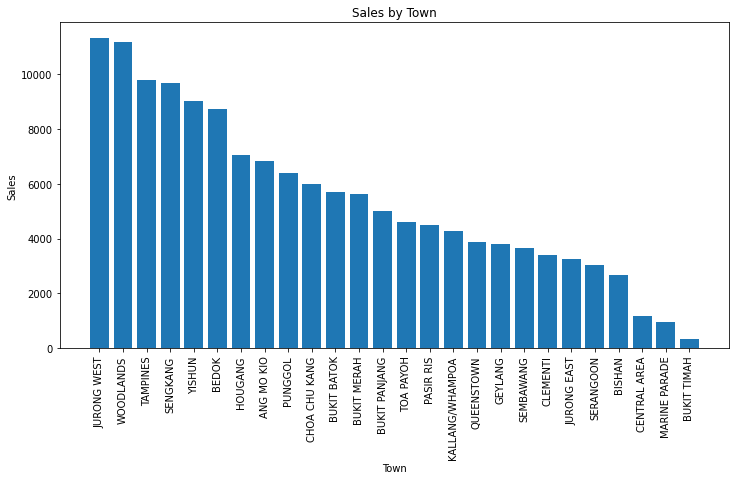

In [76]:
town_counts = {}

# Step 1: Prepare data
for row in data:
    town = row['town']
    if town not in town_counts:
        town_counts[town] = 1
    else:
        town_counts[town] += 1

town_counts = dict(sorted(town_counts.items(), key=lambda x: x[1], reverse=True))
x = town_counts.keys()
y = town_counts.values()

town_counts
# Step 2: Plot!
plt.figure(figsize=(12,6))
plt.title('Sales by Town')
plt.xlabel('Town')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

In [75]:
town_counts = dict(sorted(town_counts.items(), key=lambda x: x[1], reverse=True))
town_counts

{'JURONG WEST': 11309,
 'WOODLANDS': 11164,
 'TAMPINES': 9757,
 'SENGKANG': 9657,
 'YISHUN': 9017,
 'BEDOK': 8706,
 'HOUGANG': 7030,
 'ANG MO KIO': 6814,
 'PUNGGOL': 6402,
 'CHOA CHU KANG': 5986,
 'BUKIT BATOK': 5691,
 'BUKIT MERAH': 5617,
 'BUKIT PANJANG': 4988,
 'TOA PAYOH': 4615,
 'PASIR RIS': 4476,
 'KALLANG/WHAMPOA': 4274,
 'QUEENSTOWN': 3860,
 'GEYLANG': 3815,
 'SEMBAWANG': 3646,
 'CLEMENTI': 3407,
 'JURONG EAST': 3257,
 'SERANGOON': 3049,
 'BISHAN': 2666,
 'CENTRAL AREA': 1176,
 'MARINE PARADE': 944,
 'BUKIT TIMAH': 345}

<h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Try It Out III </font></h2>

>  - How many types of flats are there, and how many of each were sold?

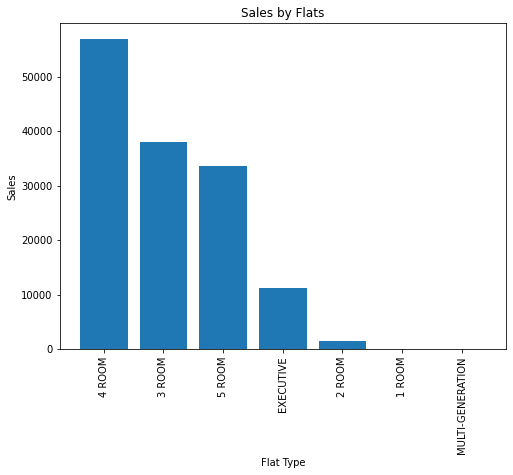

In [78]:
flat_counts = {}

# Step 1: Prepare data
for row in data:
    town = row['flat_type']
    if town not in flat_counts:
        flat_counts[town] = 1
    else:
        flat_counts[town] += 1

        
flat_counts = dict(sorted(flat_counts.items(), key=lambda x: x[1], reverse=True))
x = flat_counts.keys()
y = flat_counts.values()

town_counts
# Step 2: Plot!
plt.figure(figsize=(8,6))
plt.title('Sales by Flats')
plt.xlabel('Flat Type')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()



<hr>

<h2><img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Try It Out IV </font></h2>

### 3b. Correlation Analysis
> - To what extent is `resale_price` related to `floor_area_sqm`?

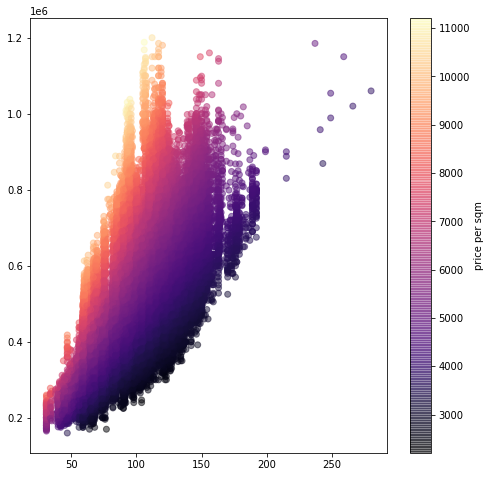

In [88]:
x = []
y = []
z = []

for row in data:
    x.append(row['floor_area_sqm'])
    y.append(row['resale_price'])
    z.append(row['resale_price']/row['floor_area_sqm'])

plt.figure(figsize=(8,8))
plt.scatter(x,y, c = z, cmap = 'magma', alpha = 0.5)
plt.colorbar(label = 'price per sqm')
plt.show()

<hr>

# Seaborn & mplleaflet

<h2><img src="https://image.flaticon.com/icons/svg/1628/1628194.svg" width=25 align="left"> <font color="salmon"> &nbsp; Example</font></h2>

### 3c. Time-series Analysis

> - Over time, for a given town (captured by the variable `town` below), visualise its price movements

In [89]:
from IPython.display import IFrame
IFrame("https://data.gov.sg/dataset/hdb-resale-price-index/resource/52e93430-01b7-4de0-80df-bc83d0afed40/view/14c47d07-1395-4661-8466-728abce27f5f", width="100%", height="300")

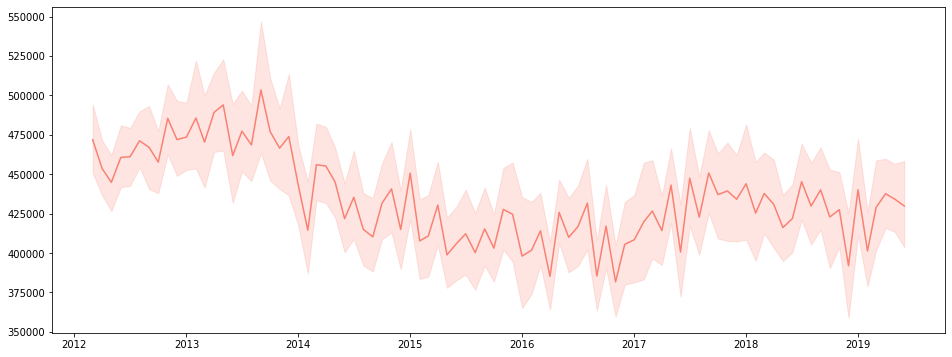

In [101]:
from datetime import datetime

chosen_town = 'BUKIT PANJANG'

# Step 1: Prepare data
x = [] # time
y = [] # prices

for row in data:
    town = row['town']
    month = row['month']
    price = row['resale_price']
    
    if town == chosen_town:
        x.append(datetime.strptime(month, "%Y-%m"))
        y.append(price)

# Step 2: Plot!
plt.figure(figsize=(16,6))
sns.lineplot(x, y, color='salmon')
plt.show()

<hr>

# Advanced Visualisations

1. Scatter Plots + Maps (Geospatial)
> Plot points on a map, visualising location-based insights

2. Distribution (Histograms)
> Visualise how a single variable is distributed

3. Hexbin 
> Visualise the distribution of and relationship between two variables (bivariate distribution)

4. Countour Plots
> Visualising and comparing multiple bivariate distributions

### 3d. Simple Geospatial Analysis

Example: `Dengue Clusters`

In [102]:
from IPython.display import IFrame
IFrame("https://data.gov.sg/dataset/dengue-clusters/resource/801ce5ce-fb99-4211-94fe-9d8ca5e182d4/view/07e4bfc9-8675-4534-959f-768be06aeeab", width="100%", height="300")

> - Heatmap of streets / town popularity (cost or count)

In [112]:
from collections import Counter
import mplleaflet
plt.figure(figsize=(16, 8))

# Step 1: Prepare data
#         Accumulate towns and their respective count into a dictionary
#         Accumulate towns and their respective lons into a dictionary
#         Accumulate towns and their respective lats into a dictionary
#         Then, extract out the values into three seperate lists

counts = {}
longitudes = {}
latitudes = {}

for row in data:
    town = row['town']
    lon = row['town_lon']
    lat = row['town_lat']
    
    if town not in counts:
        counts[town] = 1
        longitudes[town] = lon
        latitudes[town] = lat
    else:
        counts[town] += 1

# ...

x = [] # <- long
y = [] # <- lat
z = [] # <- count

for town, count in counts.items():
    z.append(count)
    x.append(longitudes[town])
    y.append(latitudes[town])
# ...
    
# Step 2: Plot!

plt.scatter(x, y, c=z, s=z, alpha=0.5, cmap='Reds')
mplleaflet.display()

<img src="https://seaborn.pydata.org/_images/distributions_6_0.png" align="right" width=200>

### 3e. Distribution (Histogram)
_Shows how a single variable is distributed_

We can see where values are concentrated and if any skewness exists

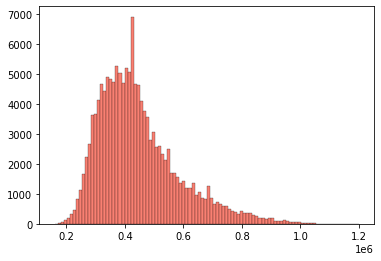

In [116]:
# Step 1: Accumulate prices (numbers) into a list

prices = []
for row in data:
    prices.append(row['resale_price'])

# Step 2: Plot!
plt.hist(prices, bins=100, color='salmon', edgecolor='black', linewidth=0.25)  # sns.distplot(prices)
# sns.distplot(prices)
plt.show()

<img src="https://seaborn.pydata.org/_images/hexbin_marginals.png" align="right" width=200>

### 3f. Hexbin Plots
_Shows the counts of observations that fall within hexagonal bins._

Two important components:
1. Distribution of two variables
2. Relationship between two variables

#### Example
> Visualise the distribution of and relationship between `resale_price` and `floor_area_sqm` for the town `BUKIT PANJANG`

<hr>

#### Seaborn function:
```python
sns.jointplot(x, y, kind='hex')
```

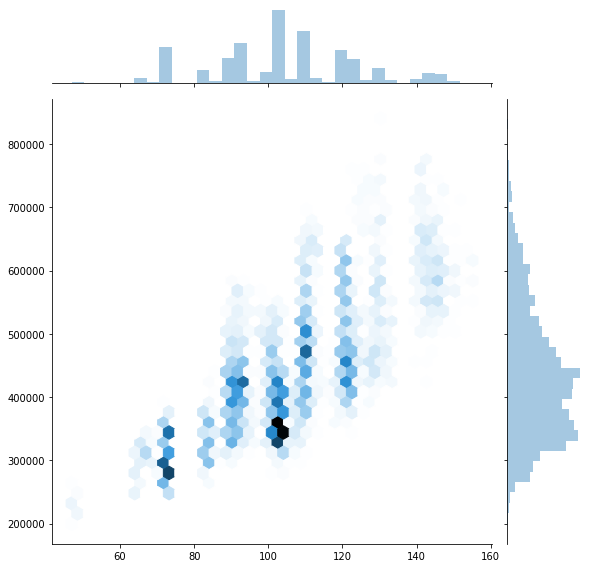

In [122]:
town = 'BUKIT PANJANG'

# Step 1: Prepare data
#         Accumulate price and floor_area_sqm of each row into their lists

prices = []
areas = []

for row in data:
    if row['town'] == town:
        prices.append(row['resale_price'])
        areas.append(row['floor_area_sqm'])

# ...
        
# Step 2: Plot!

sns.jointplot(areas, prices, kind='hex', height=8)
plt.show()

<img src="https://seaborn.pydata.org/_images/multiple_joint_kde.png" align="right" width=200>

### 3g. Contour Plots

Kernel density estimation (KDE) is a technique that allows you to create a smooth curve given a set of data. 

This can be useful if you want to visualize the distribution of some data as a kind of continuous (vs discrete) histogram. 

Seaborn uses this technique to create contour plots, allowing us to visualise a bivariate distribution.

[Click here](https://mathisonian.github.io/kde/) to find out more about KDE.

#### Example
> Compare `resale_price` and `floor_area_sqm` for `TOA PAYOH` and `BISHAN`

<hr>

#### Seaborn function:
```python
sns.kdeplot(x, y, shade=True, shade_lowest=False)
```

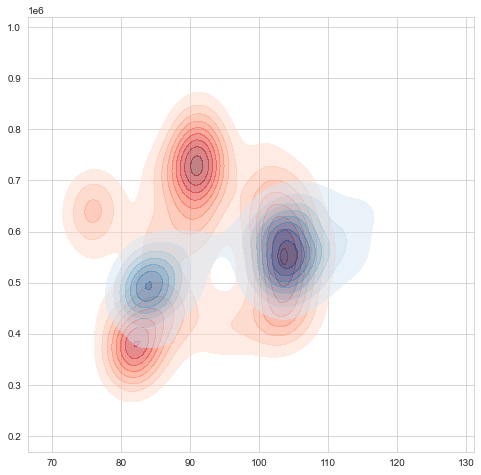

In [126]:
import seaborn as sns
sns.set_style('whitegrid')

town1 = 'TOA PAYOH'
town2 = 'BISHAN'
flat_type = '4 ROOM'

# Step 1: Prepare data
#         Accumulate price and floor_area_sqm for both towns into their respective lists

town1_areas = []
town1_prices = []

town2_areas = []
town2_prices = []

for row in data:
    if row['flat_type'] == flat_type:
        if row['town'] == town1:
            town1_areas.append(row['floor_area_sqm'])
            town1_prices.append(row['resale_price'])
        elif row['town'] == town2:
            town2_areas.append(row['floor_area_sqm'])
            town2_prices.append(row['resale_price'])

# ...
            
# Step 2: Plot!

plt.figure(figsize=(8, 8))
sns.kdeplot(town1_areas, town1_prices, cmap="Reds", shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(town2_areas, town2_prices, cmap="Blues", shade=True, shade_lowest=False, alpha=0.5)
plt.show()

<hr>
    <center>
        <h1> In-Class Practice </h1>
    </center>
<hr>

### Exploratory Data Analysis

There are still more insights that can be harvested from this dataset.
Answer the following questions with the tools you've learnt over the past 5 weeks.

<div class="alert alert-success">
    Bonus: <strong>visualise</strong> the output of each question, rather than displaying text, where possible!
</div>

In [ ]:
import matplotlib.pyplot as plt

### Q1. Each Town's Mean Price per Sqm

<p>
    <font color="grey">
        The price of a given flat is likely to be determined by its size, as we saw above. However, property prices are determined by a long list of other factors, such as proximity to amenities and public transport. Comparing the mean price per sqm of all flats sold in each town should give us a picture of how these towns are valued.
    </font>
</p>

> Determine mean `price per sqm` for all resale flats sold in each individual town.

Expected output:
```python
{'CENTRAL AREA': 7364.147617284561,
 'QUEENSTOWN': 6563.074741172909,
 'BUKIT MERAH': 6415.619384024125,
 ...}
```

In [139]:
town_prices_per_sqm = {}

# Step 1: dictionary aggregation
town_prices = {}

for row in data:
    town = row['town']
    prices = row['resale_price']
    area = row['floor_area_sqm']
    if town not in town_prices:
        town_prices[town] = []
    town_prices[town].append(prices/area)
    
# Step 2: do the calculation
for town,price in town_prices.items():
    town_prices_per_sqm[town] = sum(price)/len(price)

dict(sorted(town_prices_per_sqm.items(), key = lambda x: x[1], reverse=True))

{'CENTRAL AREA': 7364.147617284561,
 'QUEENSTOWN': 6563.074741172909,
 'BUKIT MERAH': 6415.619384024125,
 'BUKIT TIMAH': 6366.151206746576,
 'MARINE PARADE': 6276.900433808014,
 'BISHAN': 5771.836854026665,
 'KALLANG/WHAMPOA': 5690.743395865742,
 'TOA PAYOH': 5503.160769789685,
 'CLEMENTI': 5392.191837620104,
 'GEYLANG': 5204.593023412762,
 'ANG MO KIO': 4971.506689443308,
 'SERANGOON': 4947.882781587902,
 'BEDOK': 4769.466481723067,
 'PUNGGOL': 4689.572575562506,
 'TAMPINES': 4545.608681052359,
 'SENGKANG': 4525.465869461796,
 'JURONG EAST': 4464.694970807959,
 'HOUGANG': 4355.702450181648,
 'BUKIT BATOK': 4302.663966302425,
 'BUKIT PANJANG': 4155.193468408425,
 'YISHUN': 4101.345089140094,
 'JURONG WEST': 4088.901898642764,
 'PASIR RIS': 4051.0208316633853,
 'SEMBAWANG': 3924.3789993103314,
 'WOODLANDS': 3803.7765572680323,
 'CHOA CHU KANG': 3723.3743843165134}

### Q2. Resale Price Estimate

<p>
    <font color="grey">
        Every couple / family intending to purchase a flat to settle down undoubtedly have constraints -- be it location, flat size, budget, etc. A programme that narrows down the search space for a suitable flat would be tremendously helpful for flat seekers. 
        
Many useful websites have search and filtering mechanisms to make users' lives easier.
    </font>
</p>

> Given a set of constraints, calculate the mean price of all flats possessing the respective attributes that satisfy them.

```python
town = 'Ang Mo Kio'
flat_type = '2 ROOM'
floor_area >= 30
```

Expected output:
```python
250175.5789...
```

In [161]:
town = 'Ang Mo Kio'
flat_type = '2 ROOM'
floor_area_threshold = 30

my_price_list = []
for row in data:
    if row['town'].lower() == town.lower() and row['flat_type'] == flat_type and row['floor_area_sqm'] >= floor_area_threshold:
        my_price_list.append(row['resale_price'])

sum(my_price_list)/len(my_price_list)

a = 10
b = 15
def summation(c,d):
    s = c + d
    return c + d

summation(a,b)

25

<hr>

# Optional Challenge

_This question includes a key aspect of data science -- data cleaning / transformation. It requires you to utilise what we've covered in week 1, string manipulation, to extract important information from unclean or ill-formatted data._

### Q1. Relationship Between Three Variables 
<p>
    <font color="grey">
        As we saw above, price and floor area have a pretty straightforward positive relationship.
For towns that command greater prices per square meter, there are probably are other factors that influence their price. For instance, the resale price is likely to be affected by the remaining lease duration too.
    </font>
</p>

> Visualise the relationship between the three variables: `resale_price`, `floor_area_sqm` and `remaining_lease`

Hint: Plot `resale_price` against `floor_area_sqm`, and color each point by the number of days left on the remaining lease.

#### Steps:
1. Data cleaning & transformation
    1. Filter for rows where `remaining_lease != ''` (not an empty string)
    2. Use string manipulation to transform strings of this format: `'79 years 11 months'` <br>
    to an integer representing the equivalent number of days: `28572` (79 * 360 + 11 * 30)
    

2. Loop over the dataset, filtering for the chosen `town`. Then, <br> append the price, area, and remaining lease day of each row (computed in step 1B) to three seperate lists, `prices`, `areas` and `remaining_lease_days`. <br> Take note of the condition in step 1A.


3. plt.scatter(`areas`, `prices`, `c=remaining_lease_days`, `cmap='Reds'`)

<hr>

A useful `str` method:

```python
    string = '20 months 10 days'
    string.split(' ') # ['20', 'months', '10', 'days']
```

In [ ]:
# below cases:
''
'92 years' # 92 years 0 months
'92 years 05 months' # no change
'92' # 92 yeats --> 92 years 0 months

In [152]:
test_case = '92 years 05 months'

def convert_str_to_days(string):
    my_string = string
    if 'year' not in my_string:
        my_string += ' years'
    if 'month' not in my_string:
        my_string += ' 0 months'
    
    tokens = my_string.split(' ')
    year = int(tokens[0])
    month = int(tokens[2])
    
    return year * 365 + month * 30


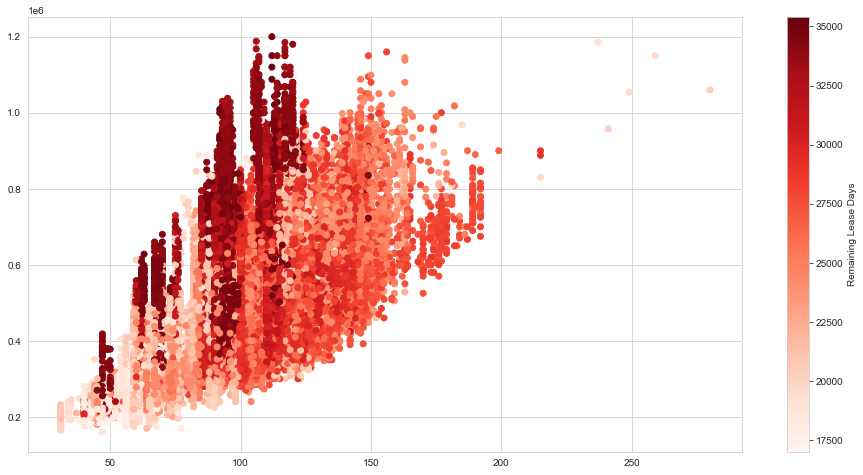

In [157]:
town = 'TAMPINES'
# town = 'JURONG WEST'

prices = []
areas = []
remaining_lease_days = []

for row in data:
    price = row['resale_price']
    area = row['floor_area_sqm']
    if (row['remaining_lease'] != ''):
        days = convert_str_to_days(row['remaining_lease'])
        prices.append(price)
        areas.append(area)
        remaining_lease_days.append(days)
# ...
plt.figure(figsize=(16,8))
plt.scatter(areas, prices, c=remaining_lease_days, cmap='Reds')
plt.colorbar(label='Remaining Lease Days')
plt.show()